# Vegetation Data Access

Accessing NDVI data

# Download Study Area

You can use any boundary for your study. One great way to get political
boundaries is through the Open Street Map API. Open Street Map is an
open-source, editable map of the world – a little like a wiki for
places. They also provide a service (or API) for looking up locations
using code.

# STEP 0: Set up

To get started on this notebook, you’ll need to restore any variables
from previous notebooks to your workspace. To save time and memory, make
sure to specify which variables you want to load.

In [1]:
%store -r

You will also need to import any libraries you are using in this
notebook, since they won’t carry over from the previous notebook:

In [1]:
# Import libraries
import geopandas as gpd
import holoviews as hv
import hvplot.pandas
from osmnx import features as osm

## Search online

It can be a little tricky to find the place you want using the OSM API.
We recommend that you start out on the [Open Street Map
(OSM)](https://www.openstreetmap.org/) web page, and search for your
site there. Then, you can get key pieces of information you will need to
reproducibly find your site area using code.

In this example, we are downloading images to match [these images from
NASA](https://svs.gsfc.nasa.gov/11290).

### STEP 1A: Navigate to Open Street Map

<figure>
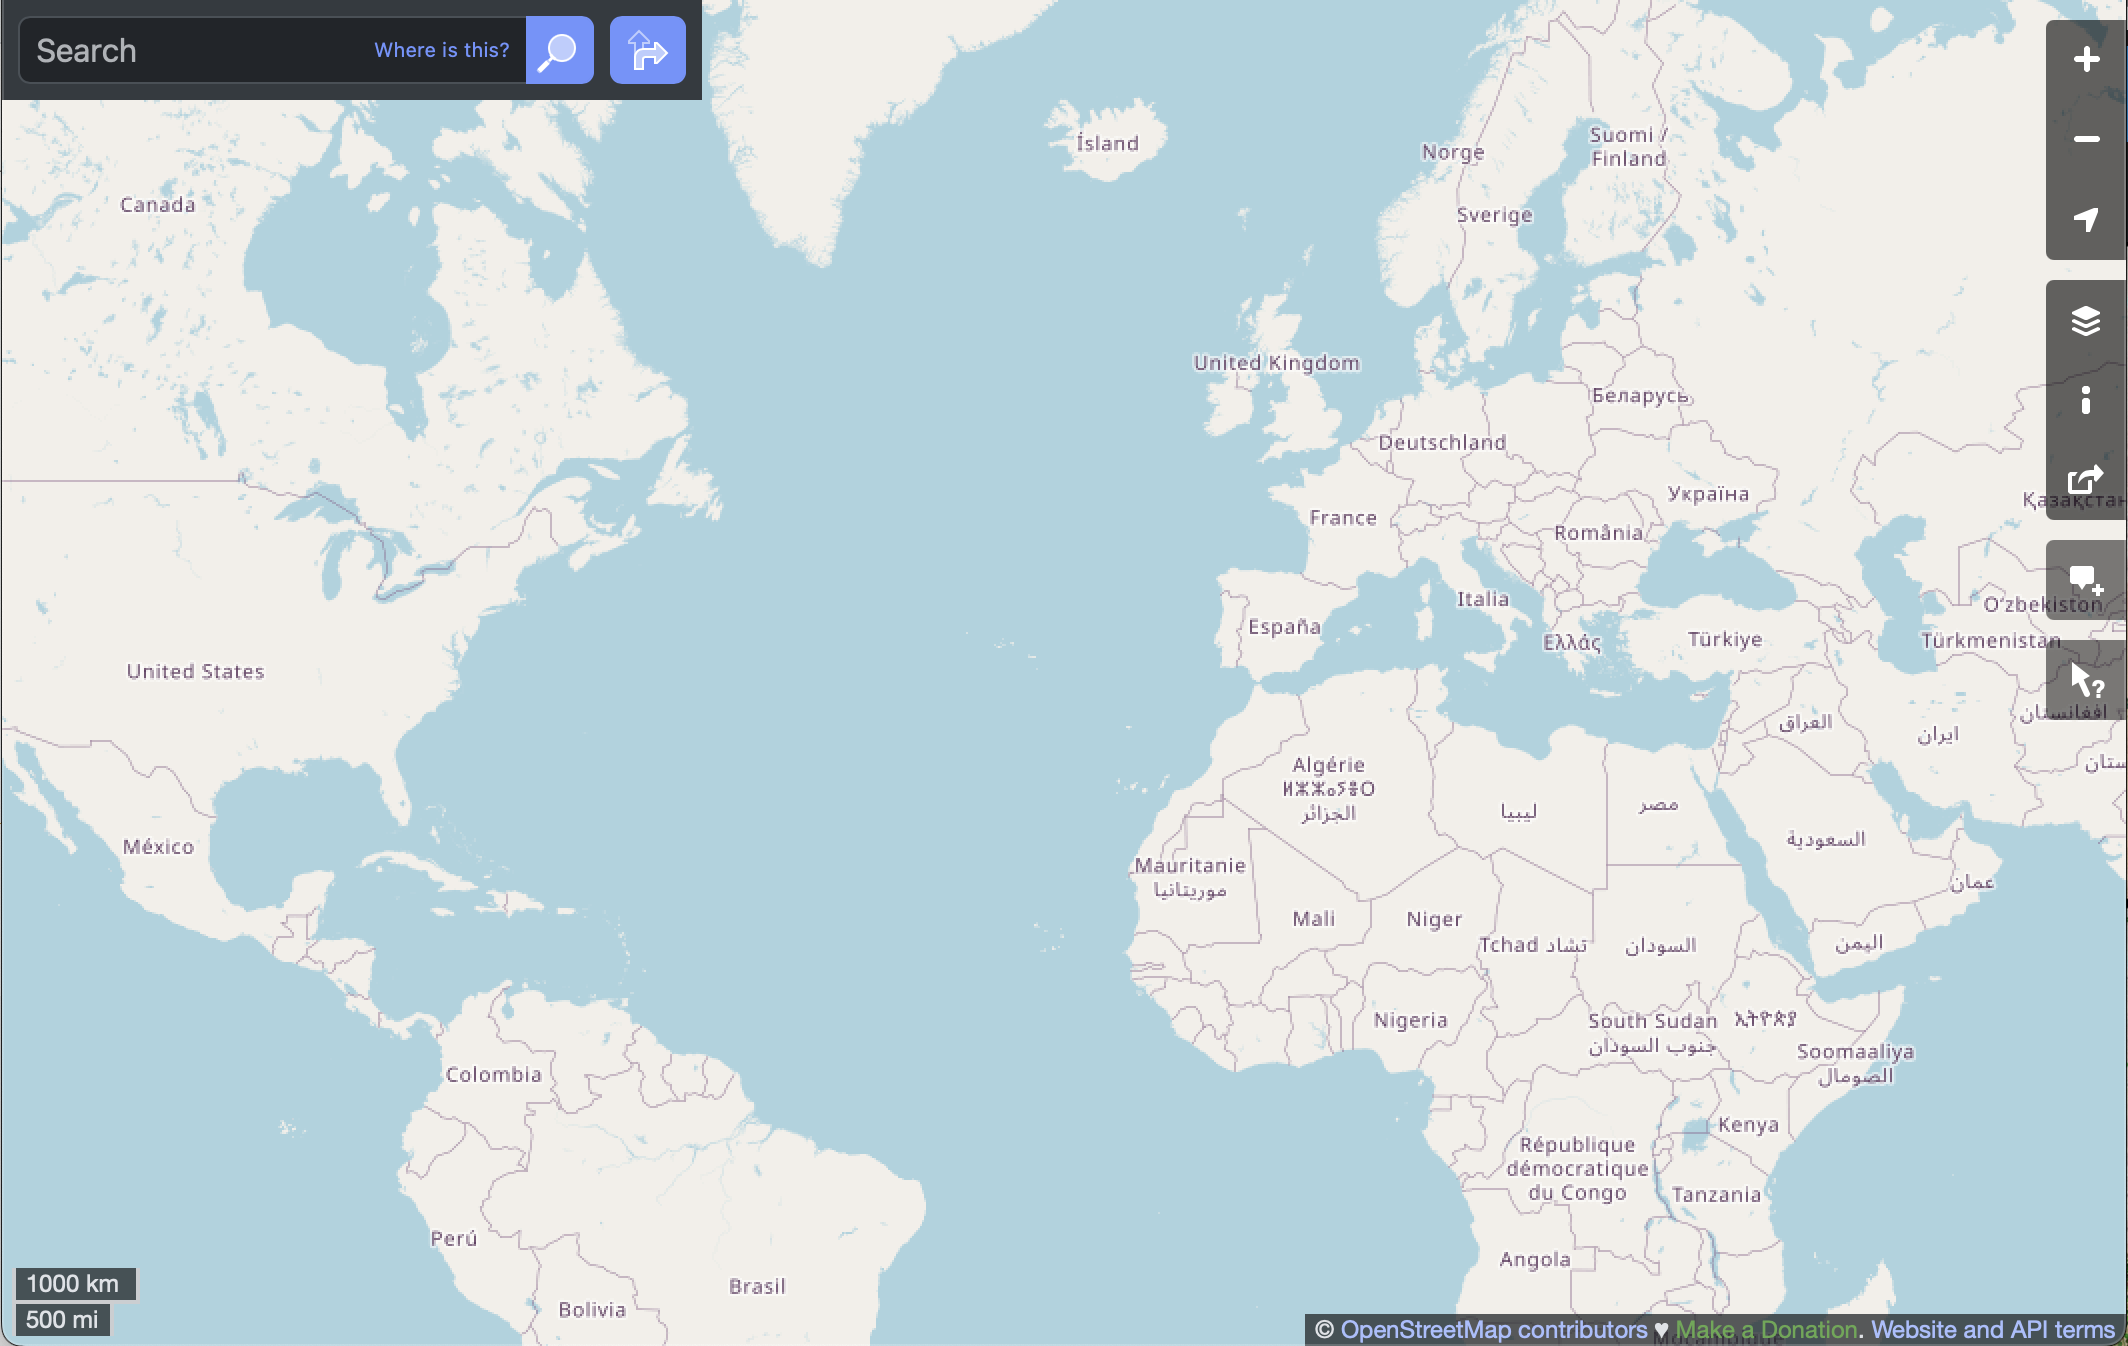
<figcaption aria-hidden="true">Start out on the <a
href="https://www.openstreetmap.org/">Open Street Map (OSM)</a> web
page</figcaption>
</figure>

### STEP 1B: Search for a nearby landmark

We’ll start by searching for the town of Tubarjal.

<figure>
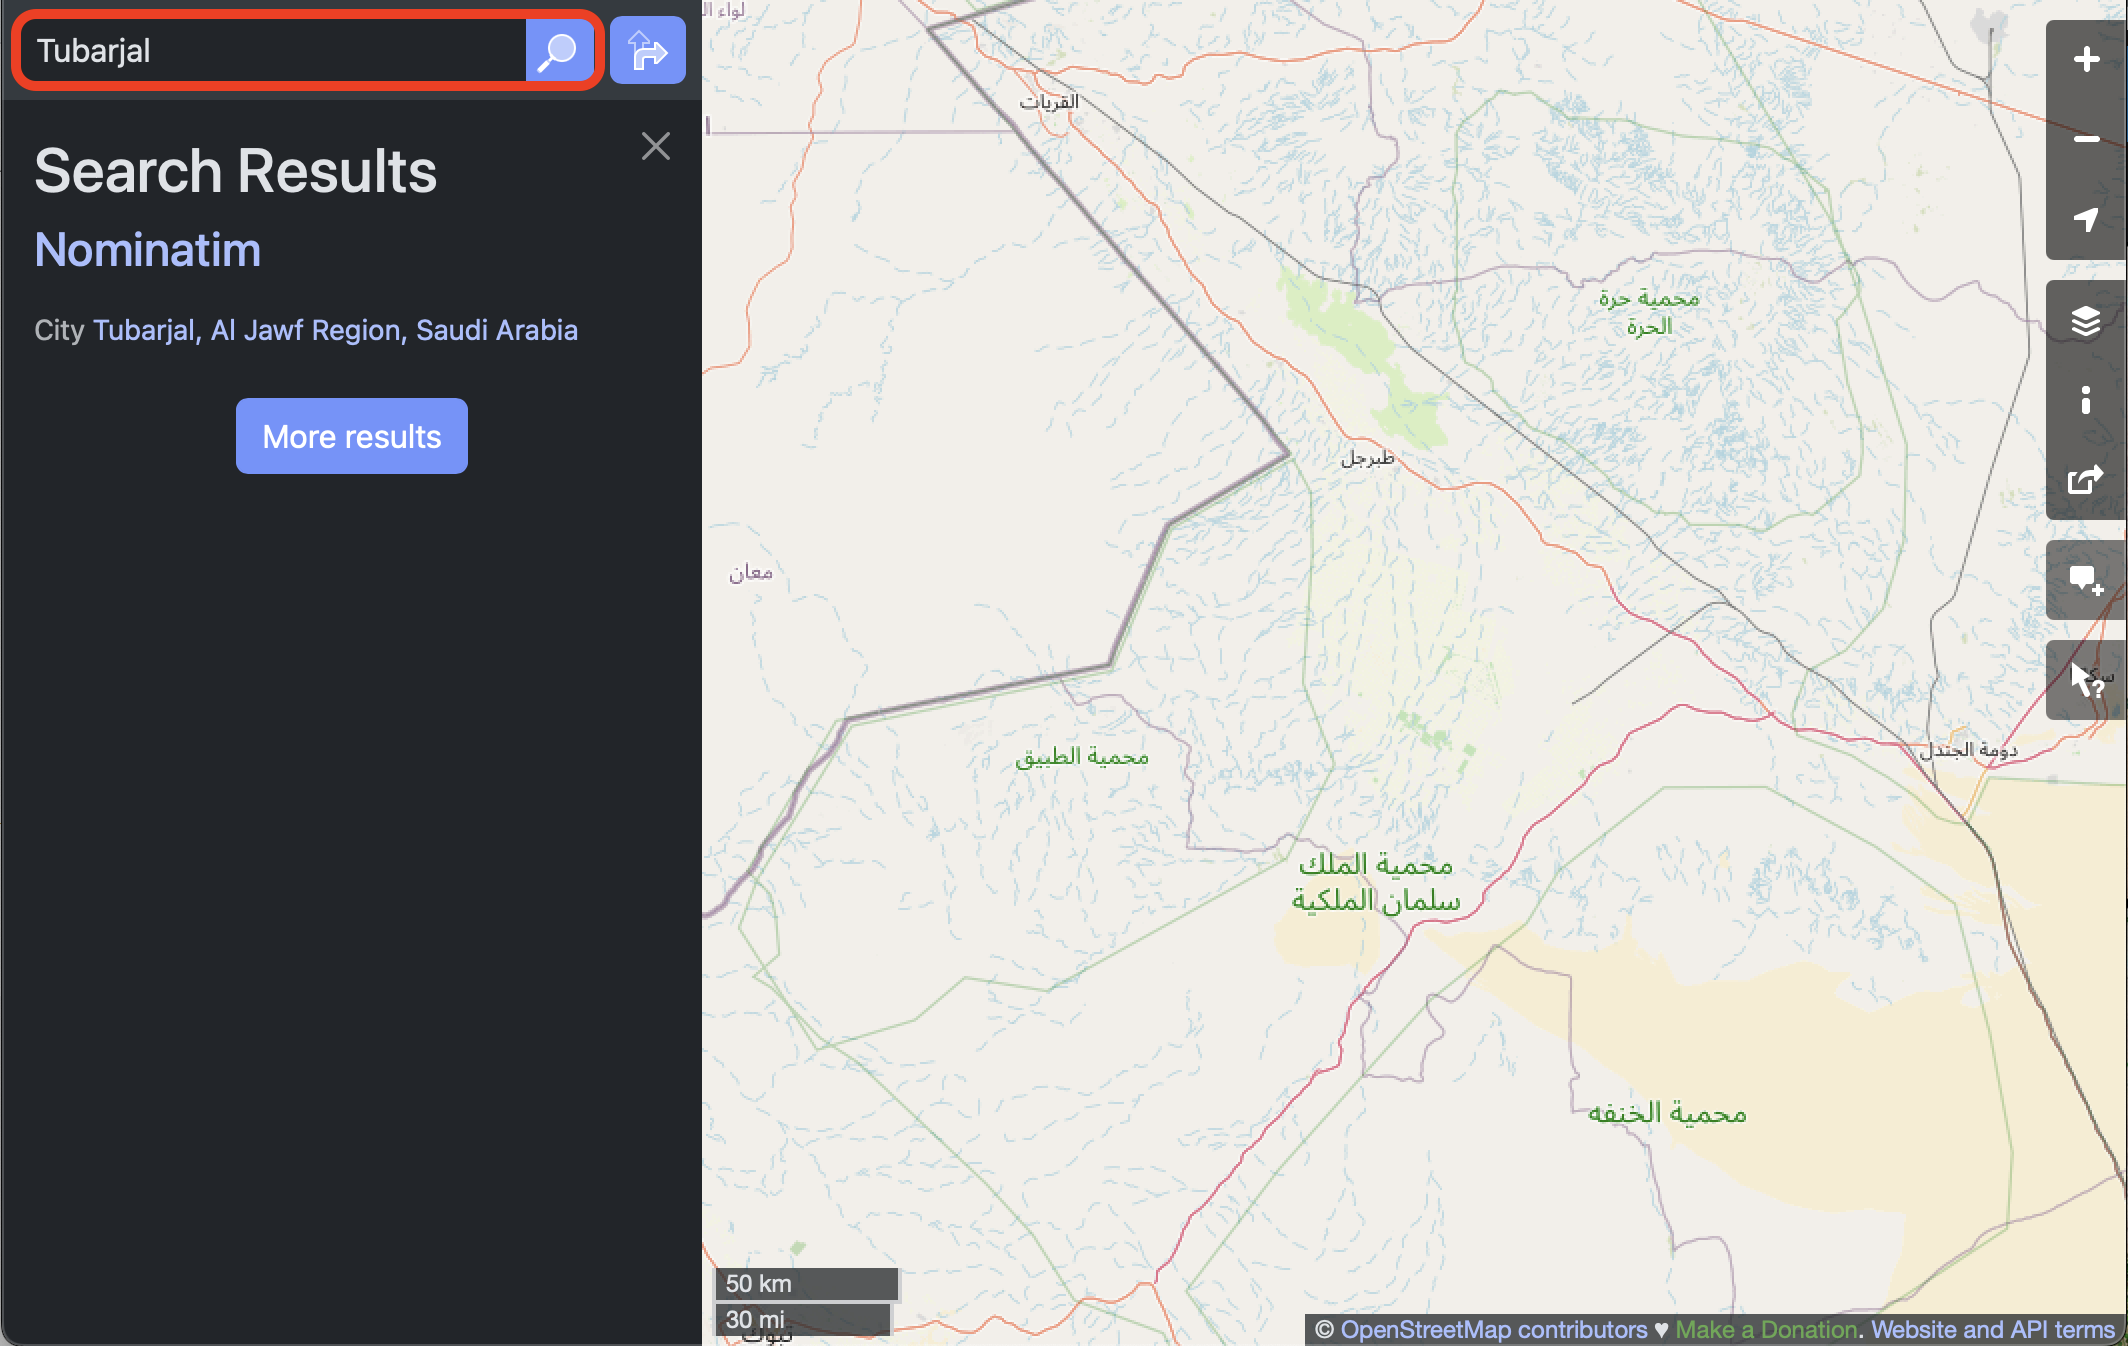
<figcaption aria-hidden="true">Search for Tubarjal.</figcaption>
</figure>

<figure>
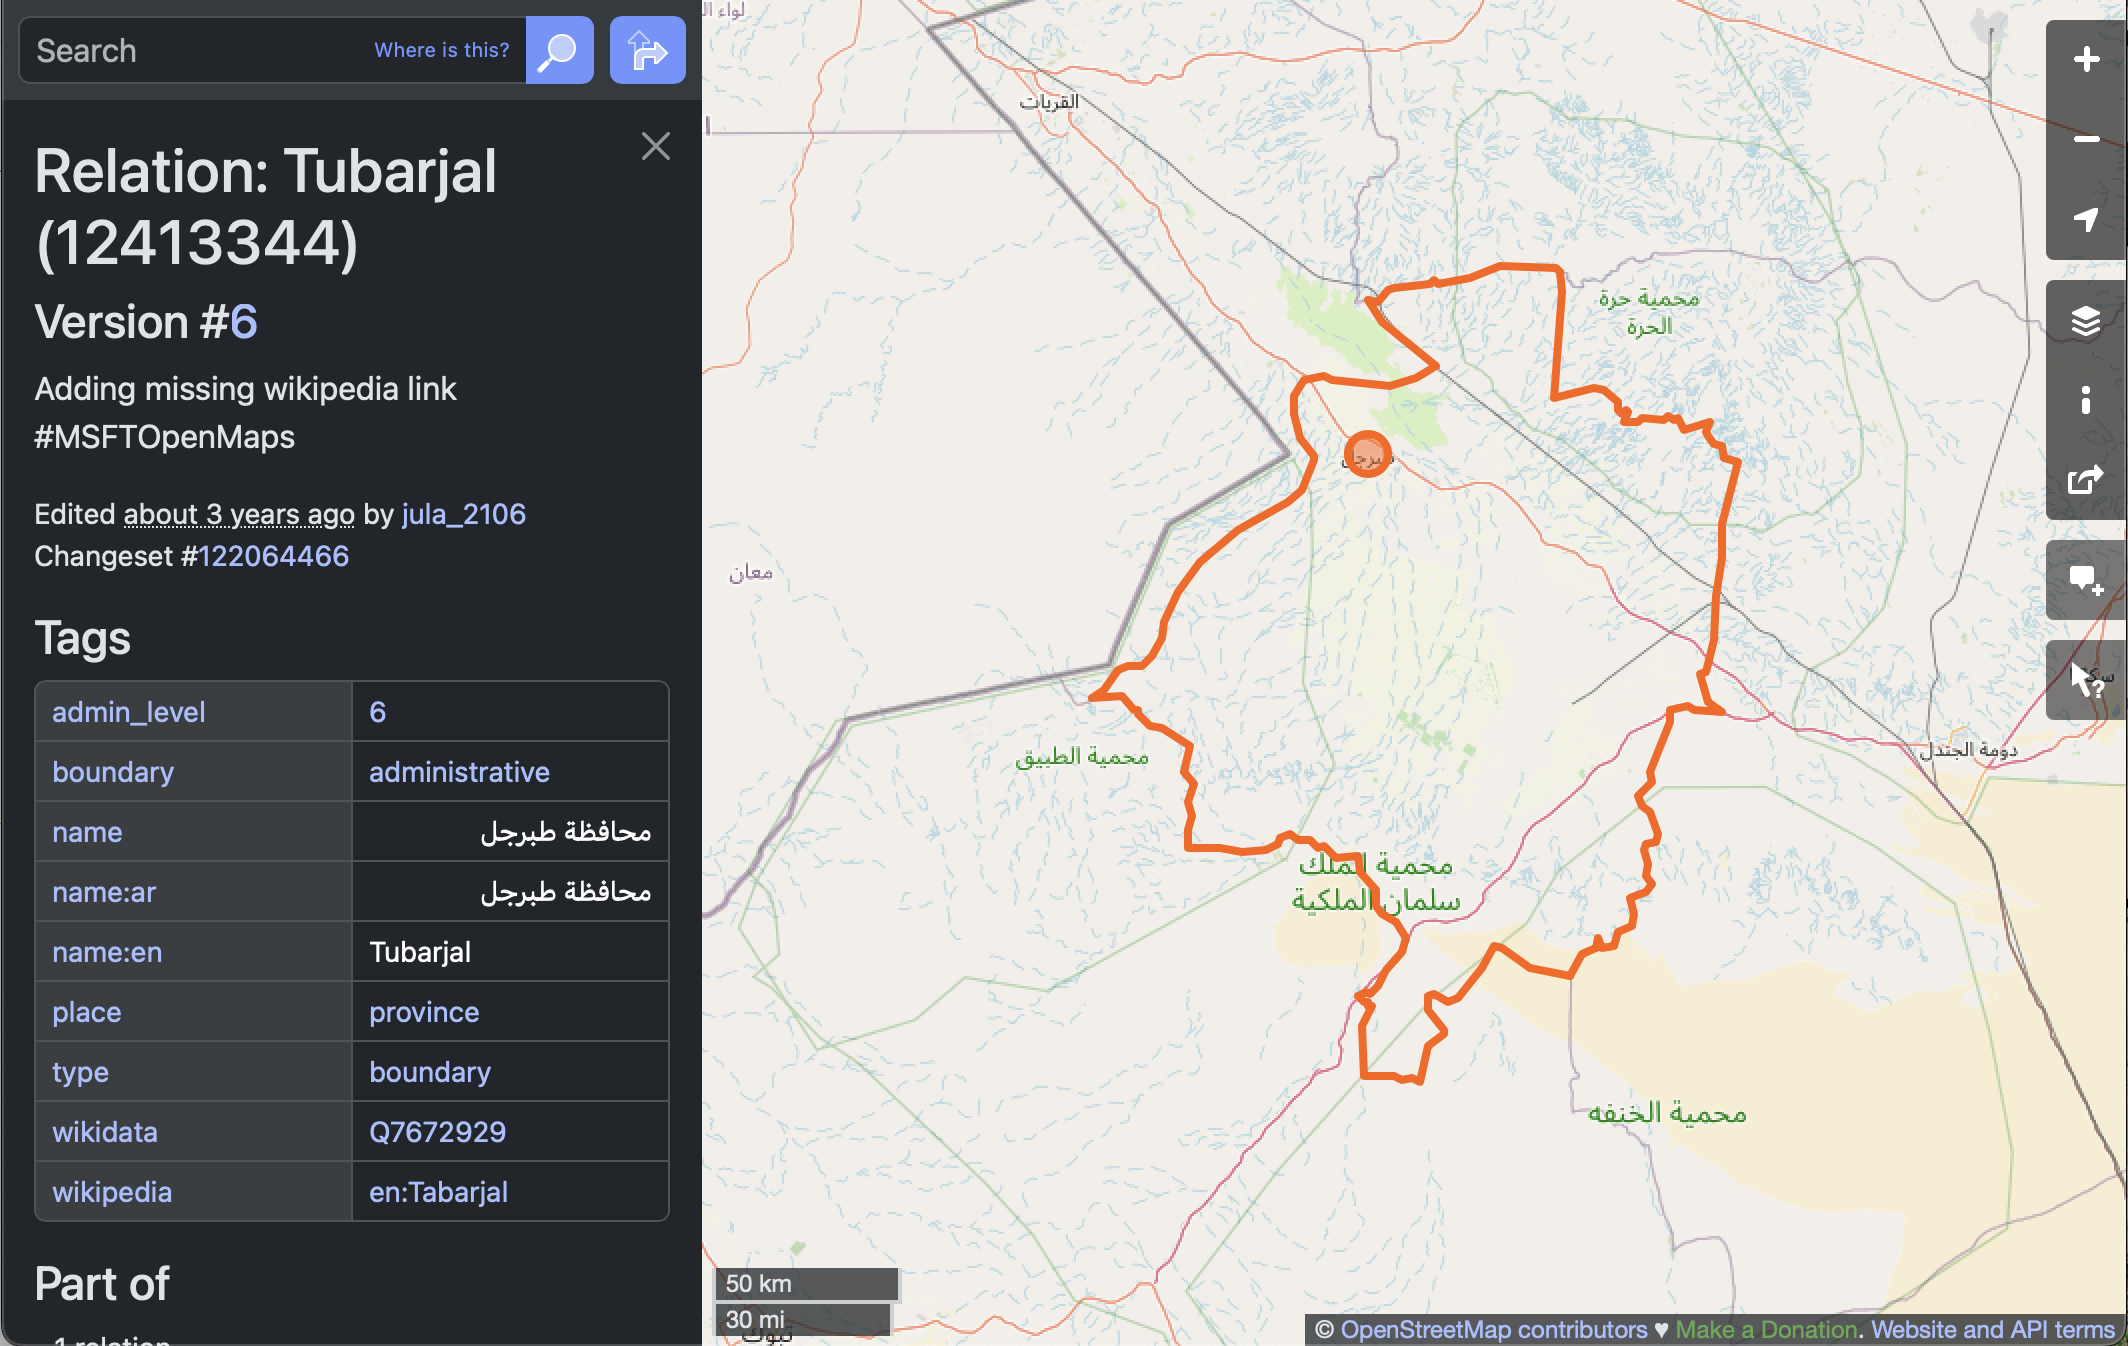
<figcaption aria-hidden="true">Select the first result.</figcaption>
</figure>

### STEP 1C: Select the region

We’ll need and area, not just a point, as a site boundary.

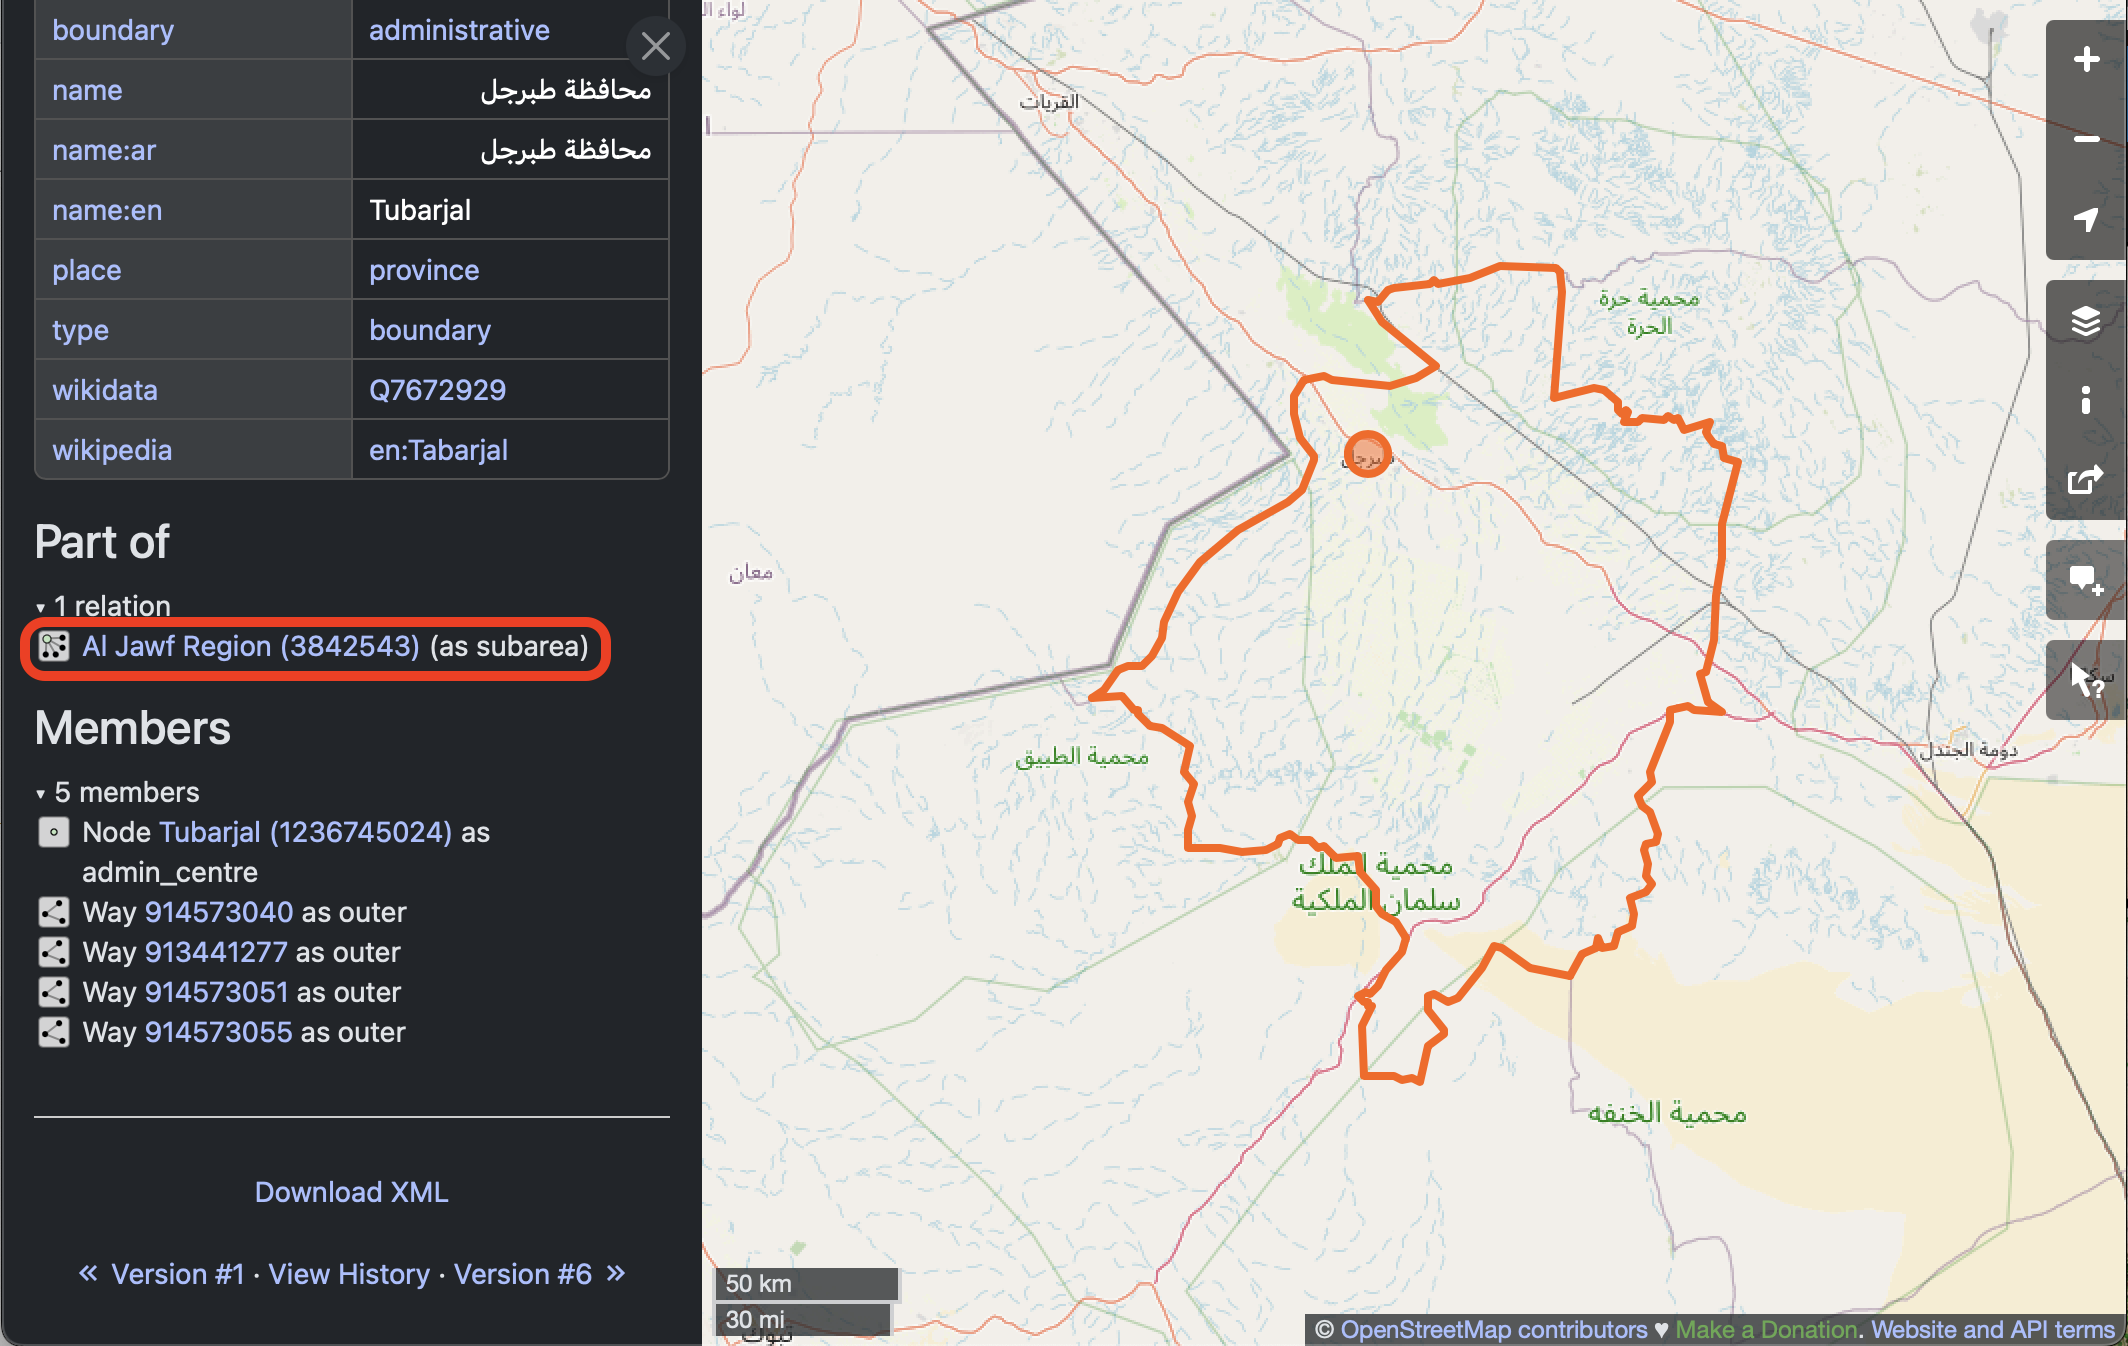
Make a note of the name of the region, as well as at least one of the
tags, for later.

<figure>
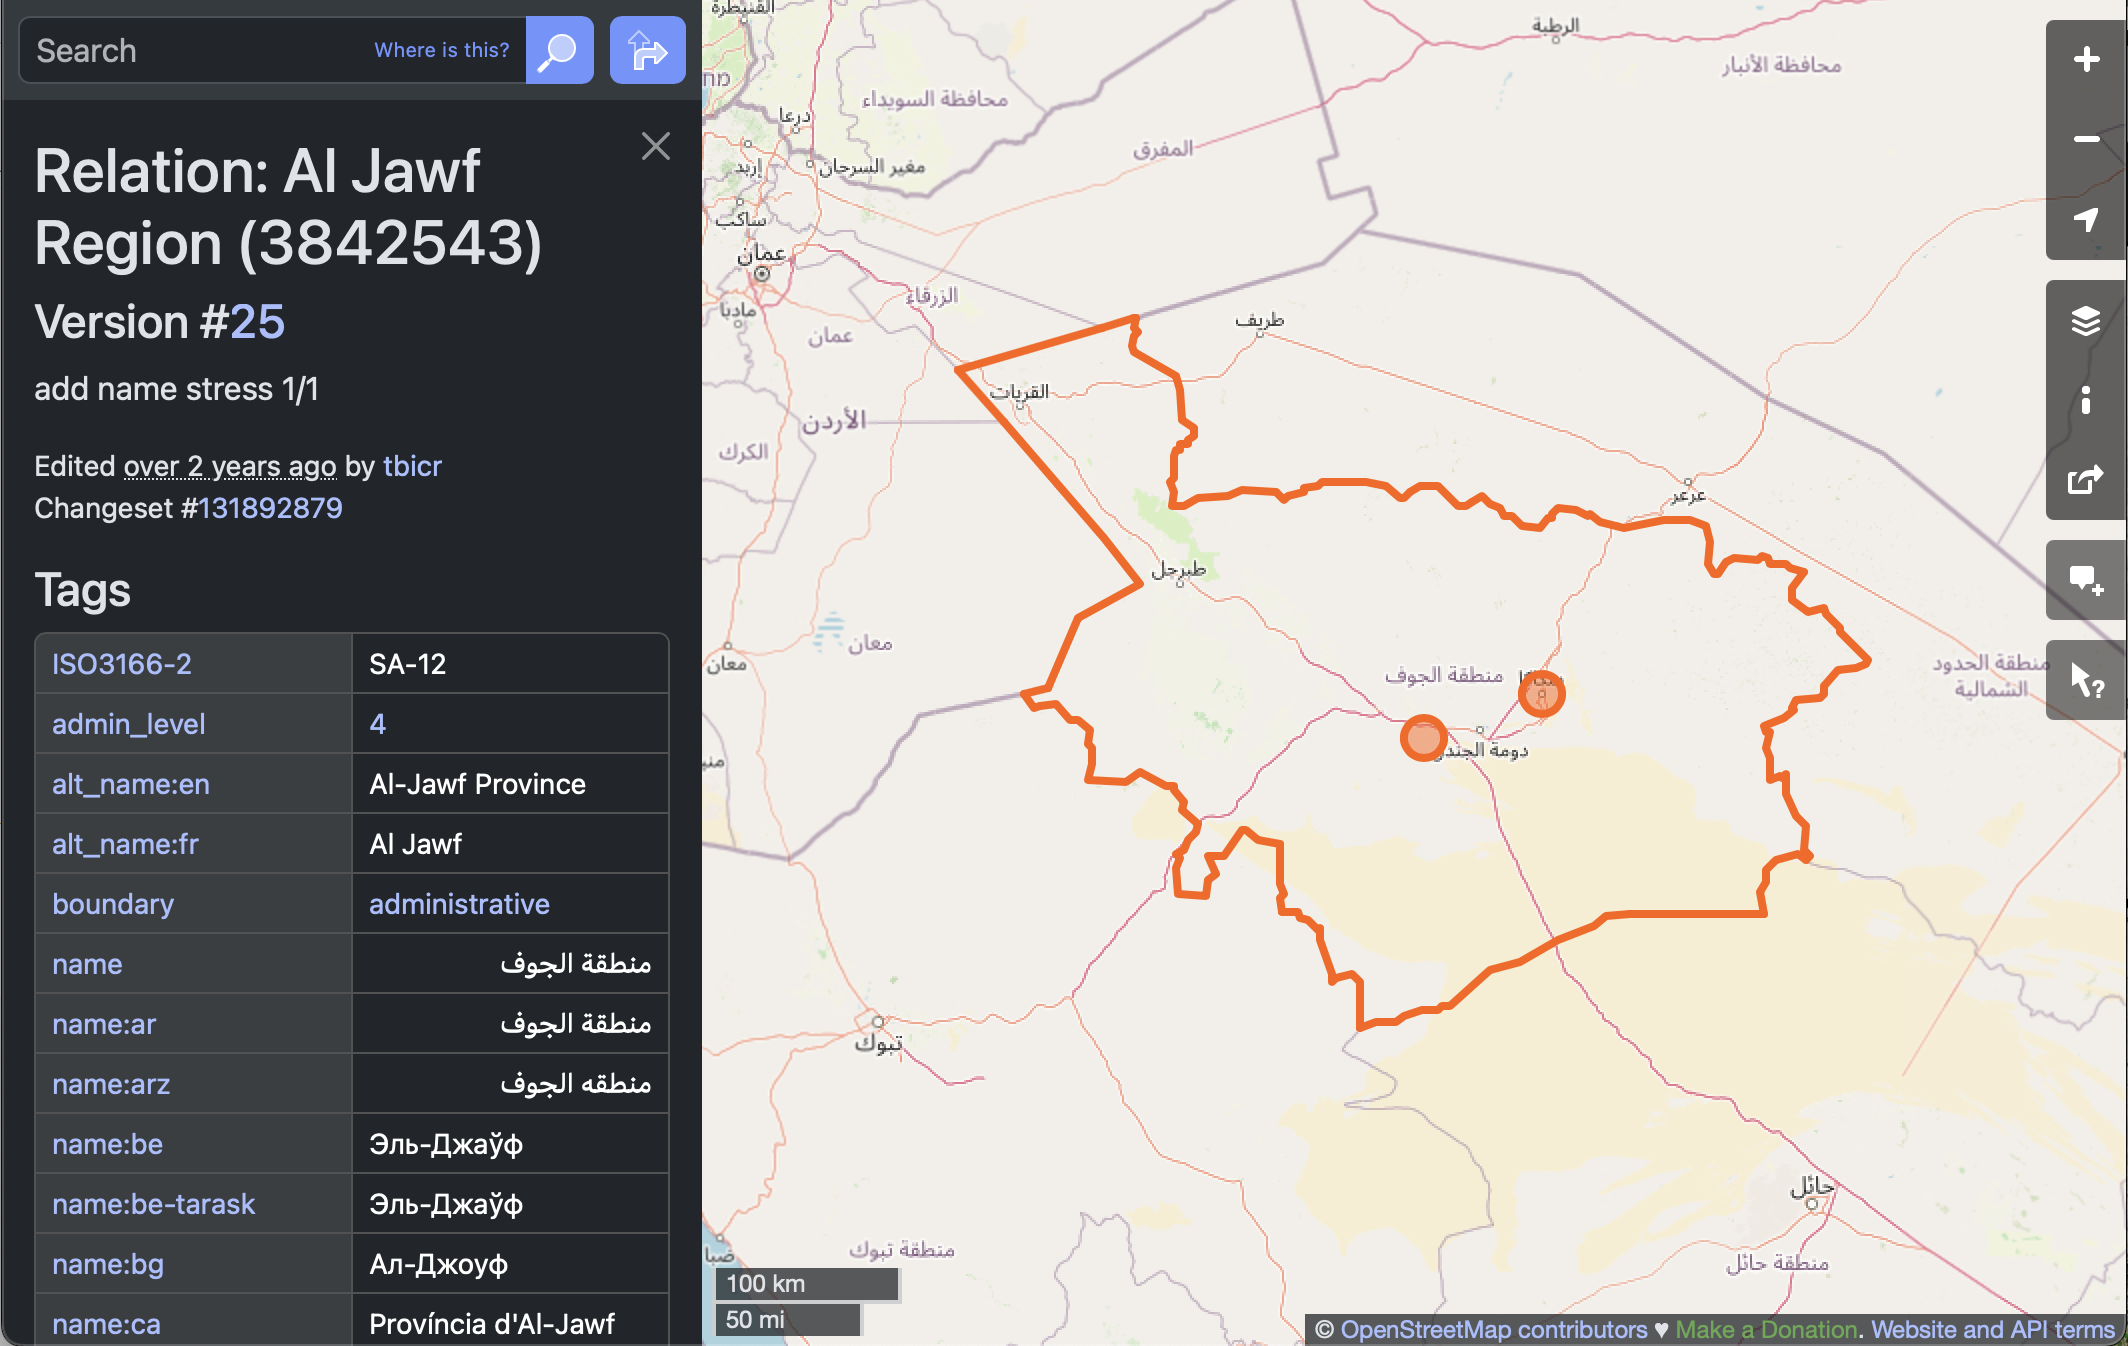
<figcaption aria-hidden="true">Copy key details about the Al Jawr region
from the OSM page.</figcaption>
</figure>

# STEP 0: Import Mapping packages

To access the Open Street Map API, we’ll use the osmnx package.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><p>Add code to import the other necessary libraries to:</p>
<ol type="1">
<li>Create interactive maps and plots</li>
<li>Save maps and plots to .html files</li>
</ol></div></div>

# STEP 1: Search for a point of interest

You can use the `osmnx` package to download and search for spatial
vector data in your area, or anywhere around the world.

In this case, we’re looking for the location of the United Tribes
Technical College campus in North Dakota. The address in here,
`'United Tribes Technical College, Bismarck, ND, United States'`, does
not have to be complete or exact, but it should be specific enough to
narrow it down.

> **Tip**
>
> You can use the [Open Street Maps](https://www.openstreetmap.org/)
> website to fine-tune your address before you copy it into your code.

With the `osmnx` library, in addition to the address or place name you
are using, you need to supply at least one tag. In this case, we are
specifying that we want it to be tagged as a boundary of type
administrative. You might have to try a couple different searches with
different addresses and/or tags to get the address you want, just like
if you are using a map website or app.

> **Tip**
>
> Check out the [list of all the different amenity types available on
> Open Street Maps](https://wiki.openstreetmap.org/wiki/Key:amenity)!
> Different amenity types might be different types of vector data, such
> as a **point** location or a building footprint **polygon**.

In [2]:
# Search for your site
boundary_gdf = osm.features_from_address(
    "Al Jawf Region",
    {"boundary": "administrative"},
    dist=1000)
boundary_gdf

geometry  ...  wikidata
element  id                                                          ...          
relation 3842543  POLYGON ((37.00617 31.50064, 37.01162 31.50183...  ...  Q1471266

[1 rows x 64 columns]

<Axes: >

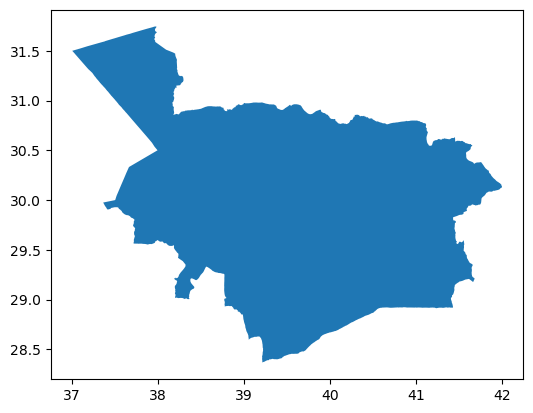

In [3]:
boundary_gdf.plot()

We have a map of **?meta:params.short_name**!

# STEP 3: Save your OSM download

The Open Street Map API is pretty reliable, and it caches the results
automatically to avoid multiple downloads. However, you still might want
to save your download, for example to distribute as part of a data
release or reproducible workflow.

In [4]:
# Create path for boundary
boundary_path = project.project_dir / boundary_dirname
# Can't overwrite existing files, which seems to be an intractable GDAL issue
if boundary_path.exists():
    shutil.rmtree(boundary_path)

# Write OSM result to shapefile
boundary_gdf.to_file(boundary_path)

NameError: name 'project' is not defined

# STEP -1: Wrap up

Don’t forget to store your variables so you can use them in other
notebooks! Replace `var1` and `var2` with the variable you want to save,
separated by spaces.

In [8]:
%store var1 var2

Finally, be sure to `Restart` and `Run all` to make sure your notebook
works all the way through!